In [12]:
library("lme4")        # model specification / estimation
library("afex")        # anova and deriving p-values from lmer
library("broom.mixed") # extracting data from model fits 
library("faux")        # data simulation
# NOTE: to install the 'faux' package, use:
# devtools::install_github("debruine/faux")
library("tidyverse")   # data wrangling and visualisation
library("grid")
library("coefplot")
library("nlme")

In [2]:
data <- read.csv("seg_vol.csv")
data$Session <- factor(recode(data$Session, "1" = "ses-1", "2" = "ses-2", "3" = "ses-3", "4" = "ses-4"))
data

Subject,Group,Session,GM,WM,CSF,Total
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
sub-01,ctr,ses-1,12090.5,35643.5,17827.0,65560.98
sub-01,ctr,ses-2,16359.1,39335.5,25273.2,80967.75
sub-01,ctr,ses-3,16862.7,40636.0,25311.4,82810.08
sub-01,ctr,ses-4,18132.3,41466.5,29853.1,89451.93
sub-02,pre,ses-1,12961.5,35441.8,18395.1,66798.43
sub-02,pre,ses-2,16915.1,40537.1,28048.5,85500.73
sub-02,pre,ses-3,17462.4,43558.4,28945.1,89965.88
sub-02,pre,ses-4,18934.0,43953.9,31150.3,94038.24
sub-03,ctr,ses-1,11149.5,38151.8,15898.5,65199.80


Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”

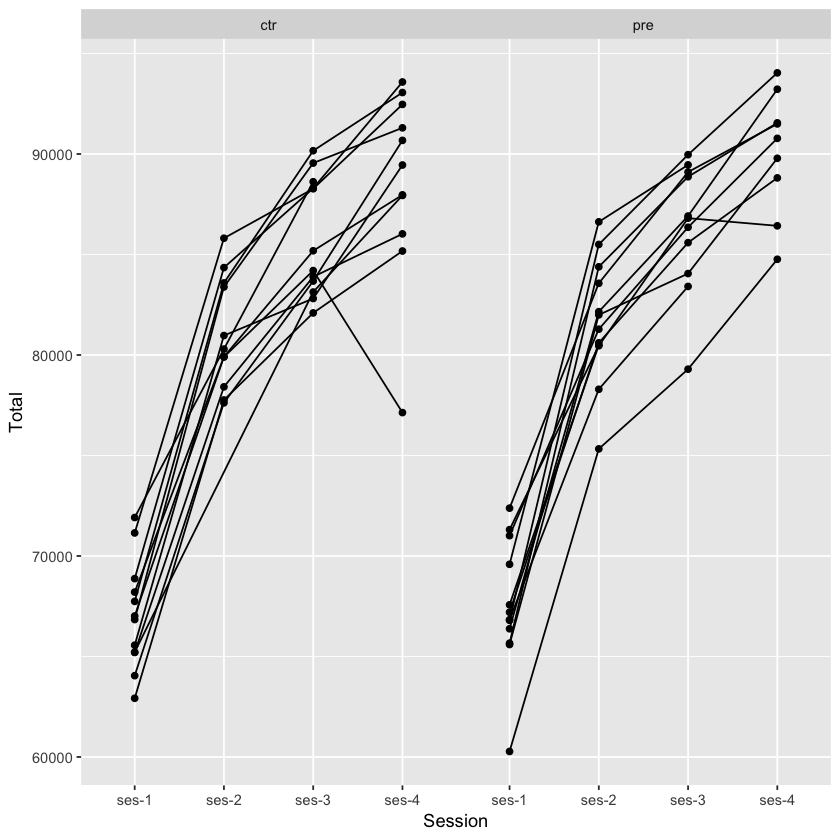

In [14]:
zmargin <- theme(panel.margin=unit(0,"lines"))
ggplot(data,aes(Session,Total))+
geom_point()+ geom_line(aes(group=Subject))+ facet_grid(.~Group)+ zmargin


In [16]:
library(nlme)
lme1 <- lme(Total~Session*Group,
  random=~1|Subject/Session,data=data)

In [18]:
VarCorr(lme1)
intervals(lme1,which="var-cov")

            Variance     StdDev   
Subject =   pdLogChol(1)          
(Intercept) 6072090.8    2464.1613
Session =   pdLogChol(1)          
(Intercept) 3678078.2    1917.8316
Residual     768065.5     876.3934

Approximate 95% confidence intervals

 Random Effects:
  Level: Subject 
                   lower     est.    upper
sd((Intercept)) 1729.445 2464.161 3511.006
  Level: Session 
                       lower     est.       upper
sd((Intercept)) 5.716385e-05 1917.832 64342735178

 Within-group standard error:
       lower         est.        upper 
8.012591e-34 8.763934e+02 9.585732e+38 

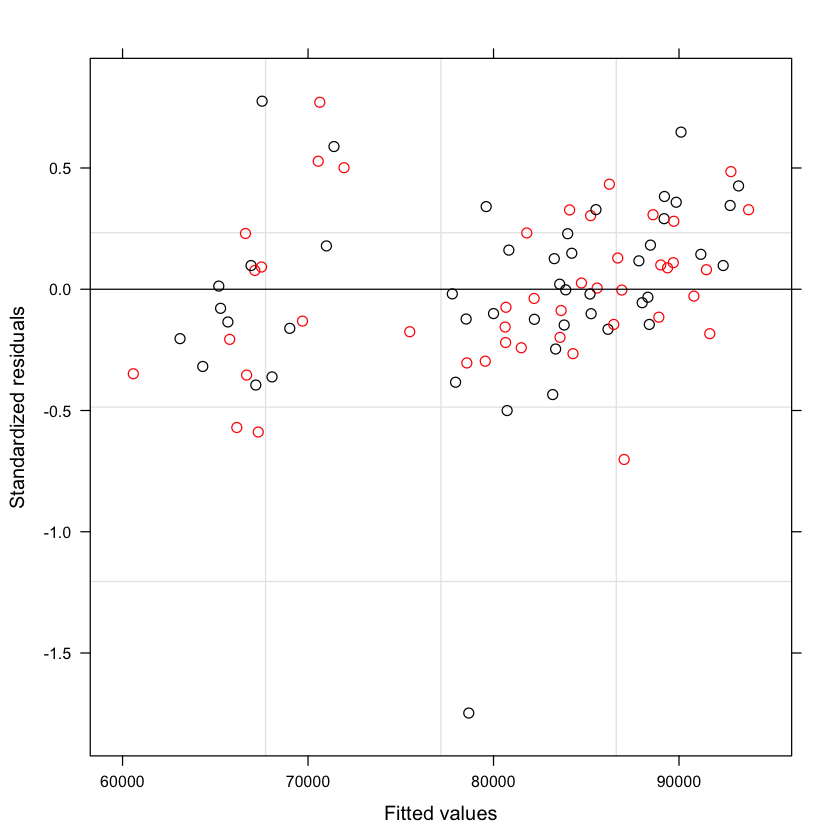

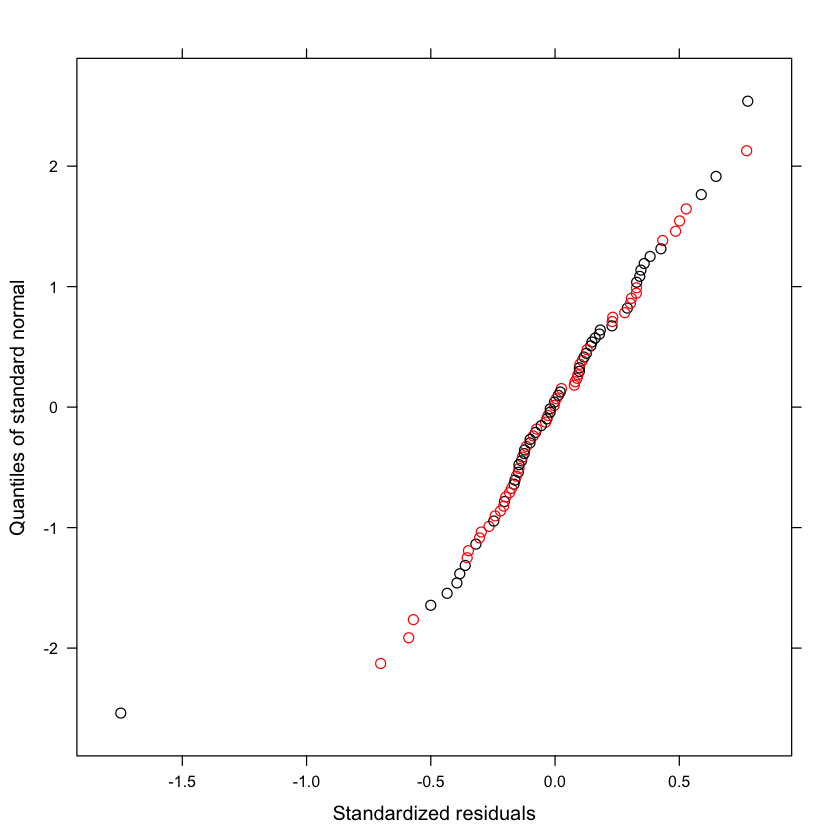

ERROR: Error in theSumm$coefficients[, 1:2]: nombre de dimensions incorrect


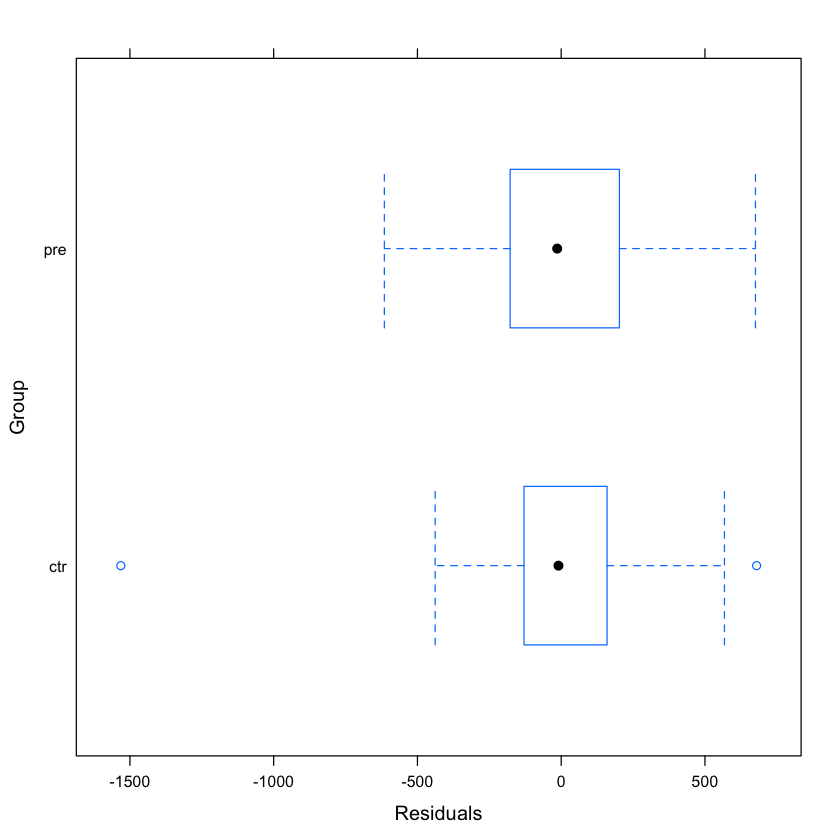

In [28]:
plot(lme1,col=data$Group)
qqnorm(lme1,col=data$Group)
plot(lme1,Group~resid(.))
library(coefplot)
coefplot(lme1)

In [36]:
mod_sim <- lmer(Total ~ Group*Session + (1 | Subject), data = data, REML = FALSE)

summary(mod_sim, corr = FALSE)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: Total ~ Group * Session + (1 | Subject)
   Data: data

     AIC      BIC   logLik deviance df.resid 
    1688     1713     -834     1668       80 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4072 -0.4329 -0.0276  0.5491  1.9581 

Random effects:
 Groups   Name        Variance Std.Dev.
 Subject  (Intercept) 5565690  2359    
 Residual             4043952  2011    
Number of obs: 90, groups:  Subject, 24

Fixed effects:
                       Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)           67055.968    894.876    46.889  74.933   <2e-16 ***
Grouppre                492.986   1265.546    46.889   0.390    0.699    
Sessionses-2          13903.786    844.318    66.617  16.467   <2e-16 ***
Sessionses-3          18768.066    820.970    66.262  22.861   <2e-16 ***
Sessionses-4          21731.034    844.318    66.617  25.738   <2e-16 ***
Gro

In [8]:
gd <- data %>% 
        group_by(Group, Session, Subject) %>% 
        summarise(Total = mean(Total))

#p <- ggplot(data = data, aes(x = Session, y = Total, group = Subject, color = Group))
#p + geom_line() + stat_smooth(aes(group = 1)) + stat_summary(aes(group = 1),
#    geom = "point", fun.y = mean, shape = 17, size = 3) + facet_grid(. ~ Group)
#p + geom_line(alpha = .1,size = 0.5) + geom_line(data = gd,alpha = .9,size = 3)

ggplot(data = data, aes(x = Session, y = Total,  color = Group)
      + geom_line(aes(group = Subject),alpha = .1,size = 0.5) + geom_line(data = gd,alpha = .9,size = 3))

ERROR: Error: Mapping should be created with `aes() or `aes_()`.


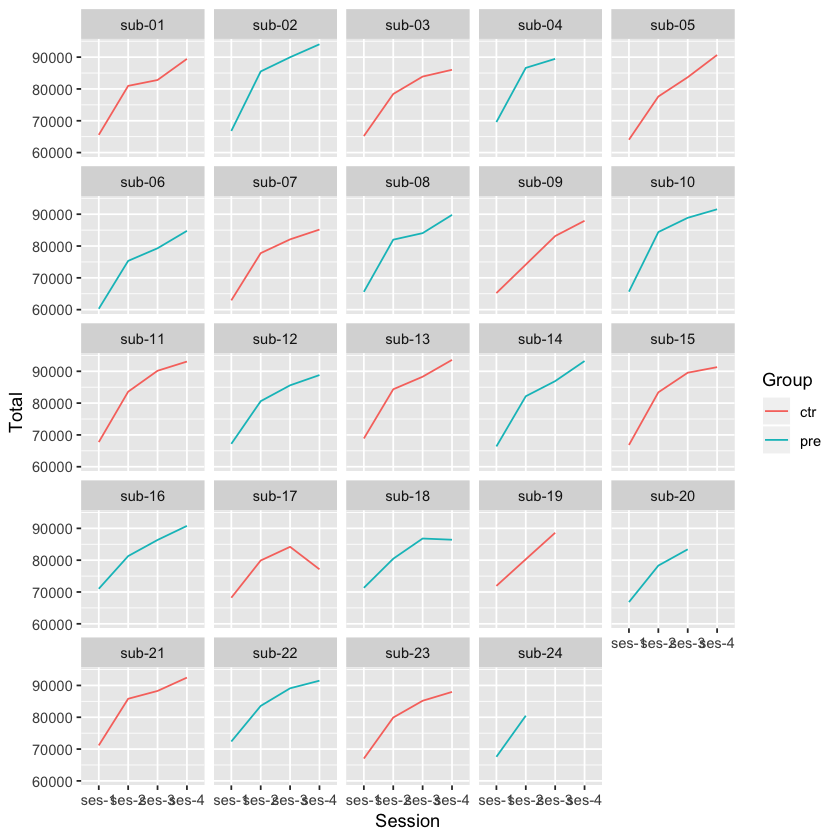

In [9]:
ggplot(data = data, aes(x = Session, y = Total, group = Subject, color = Group)) + geom_line() +
    facet_wrap(~Subject)

In [71]:
library(reshape2)
d2 <- melt(data, id.vars="Session")
d2


Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

Warning message:
“attributes are not identical across measure variables; they will be dropped”

Session,variable,value
<fct>,<fct>,<chr>
ses-1,Subject,sub-01
ses-2,Subject,sub-01
ses-3,Subject,sub-01
ses-4,Subject,sub-01
ses-1,Subject,sub-02
ses-2,Subject,sub-02
ses-3,Subject,sub-02
ses-4,Subject,sub-02
ses-1,Subject,sub-03
